In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering

In [53]:
car_df = pd.read_csv('datasets/car_sales.csv')

In [54]:
car_df.head()

,Model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,Acura Integra,16.92,16.36,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.64,13.2,28.0
1,Acura TL,39.38,19.88,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.52,17.2,25.0
2,Acura CL,14.11,18.23,0.0,NaN,3.2,225.0,106.9,70.6,192.0,3.47,17.2,26.0
3,Acura RL,8.59,29.73,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.85,18.0,22.0
4,Audi A4,20.40,22.26,0.0,23.99,1.8,150.0,102.6,68.2,178.0,3.00,16.4,27.0


In [55]:
car_df.columns

Index(['Model', 'sales', 'resale', 'type', 'price', 'engine_s', 'horsepow',
       'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg'],
      dtype='object')

In [56]:
car_df.dtypes

Model        object
sales       float64
resale      float64
type        float64
price       float64
engine_s    float64
horsepow    float64
wheelbas    float64
width       float64
length      float64
curb_wgt    float64
fuel_cap    float64
mpg         float64
dtype: object

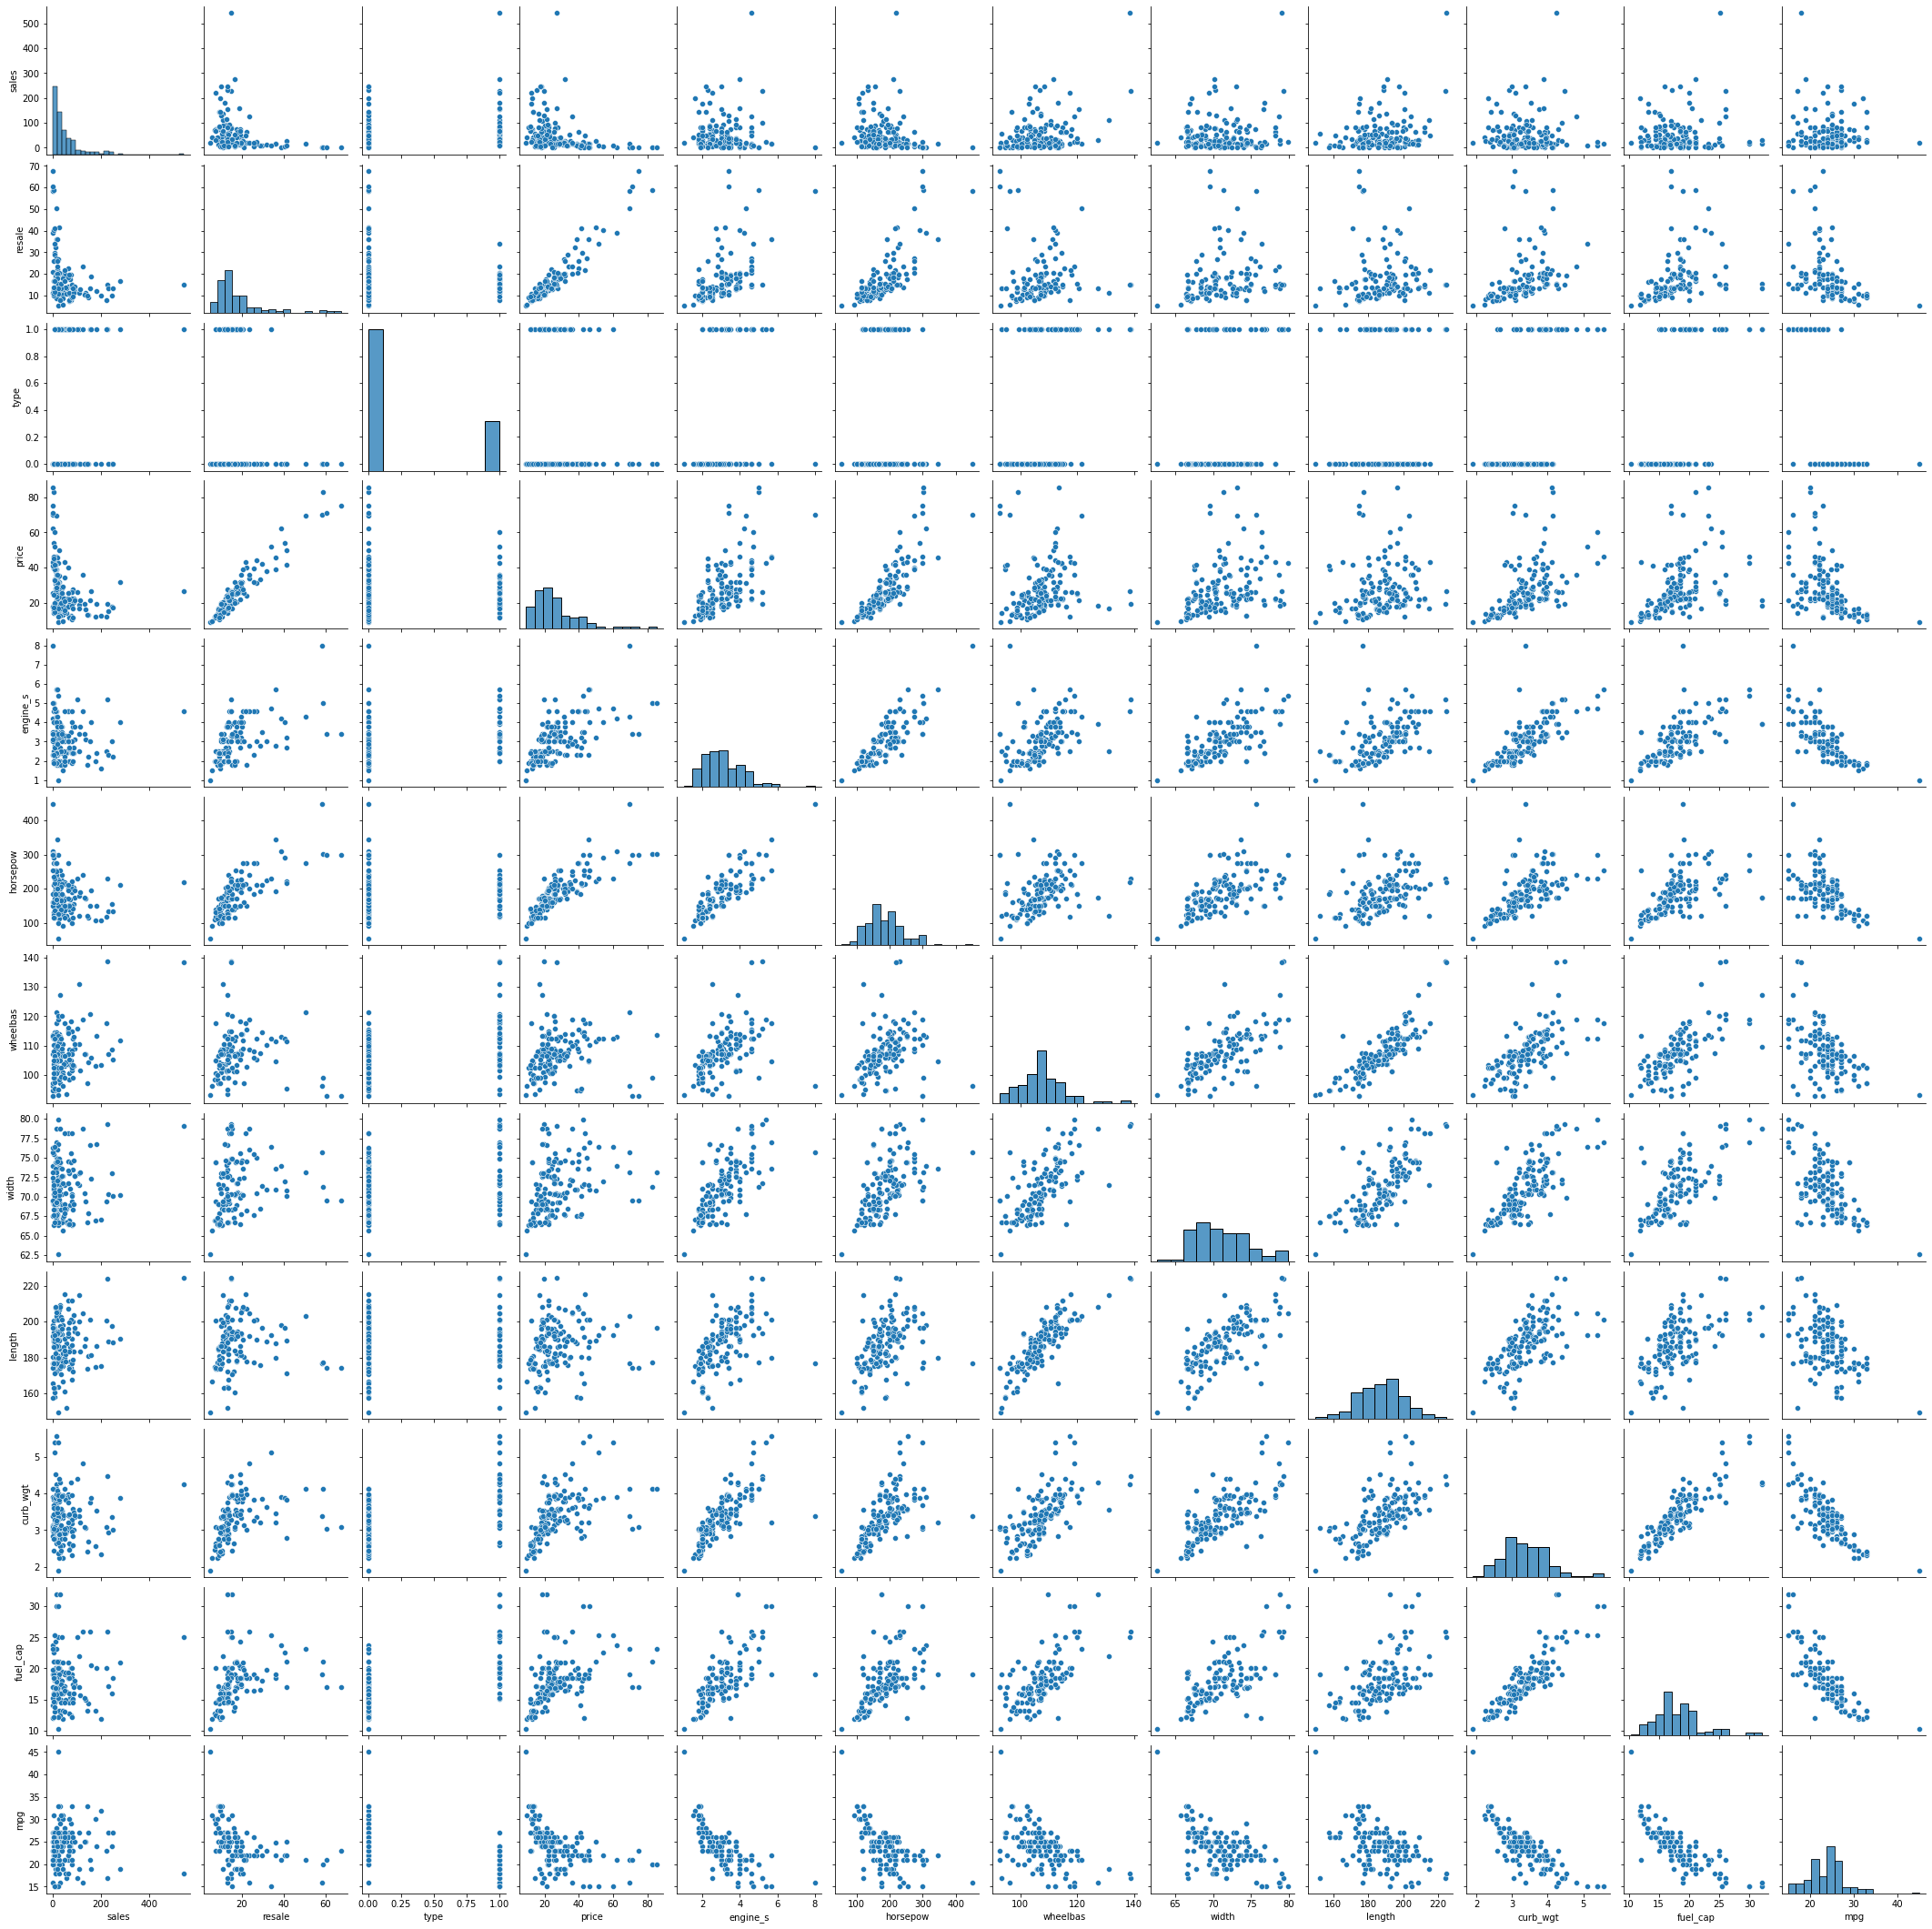

In [57]:
sns.pairplot(car_df)

In [58]:
x = car_df[['price','engine_s','horsepow','wheelbas','width', 'length','curb_wgt','fuel_cap','mpg']]

In [59]:
x.head()

,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,21.50,1.8,140.0,101.2,67.3,172.4,2.64,13.2,28.0
1,28.40,3.2,225.0,108.1,70.3,192.9,3.52,17.2,25.0
2,NaN,3.2,225.0,106.9,70.6,192.0,3.47,17.2,26.0
3,42.00,3.5,210.0,114.6,71.4,196.6,3.85,18.0,22.0
4,23.99,1.8,150.0,102.6,68.2,178.0,3.00,16.4,27.0


In [60]:
x.isna().sum()

price       2
engine_s    1
horsepow    1
wheelbas    1
width       1
length      1
curb_wgt    2
fuel_cap    1
mpg         3
dtype: int64

In [61]:
x.shape

(157, 9)

In [62]:
x = x.dropna()

In [63]:
x.isna().sum()

price       0
engine_s    0
horsepow    0
wheelbas    0
width       0
length      0
curb_wgt    0
fuel_cap    0
mpg         0
dtype: int64

In [64]:
x.head()

,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,21.50,1.8,140.0,101.2,67.3,172.4,2.64,13.2,28.0
1,28.40,3.2,225.0,108.1,70.3,192.9,3.52,17.2,25.0
3,42.00,3.5,210.0,114.6,71.4,196.6,3.85,18.0,22.0
4,23.99,1.8,150.0,102.6,68.2,178.0,3.00,16.4,27.0
5,33.95,2.8,200.0,108.7,76.1,192.0,3.56,18.5,22.0


In [65]:
x.shape

(152, 9)

In [66]:
inertia = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(x)
    inertia.append(np.sqrt(kmeans.inertia_))

Text(0, 0.5, 'Variance')

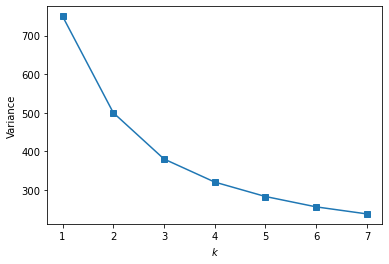

In [67]:
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('Variance')

In [68]:
kmeans = KMeans(n_clusters=2, random_state=1).fit(x)

In [69]:
y = kmeans.fit_predict(x)

In [70]:
y_df = pd.DataFrame(y, columns=['Cluster'])
new_df = pd.concat([car_df, y_df], axis=1)

In [71]:
new_df

,Model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,Cluster
0,Acura Integra,16.92,16.36,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.64,13.2,28.0,0.0
1,Acura TL,39.38,19.88,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.52,17.2,25.0,1.0
2,Acura CL,14.11,18.23,0.0,NaN,3.2,225.0,106.9,70.6,192.0,3.47,17.2,26.0,1.0
3,Acura RL,8.59,29.73,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.85,18.0,22.0,0.0
4,Audi A4,20.40,22.26,0.0,23.99,1.8,150.0,102.6,68.2,178.0,3.00,16.4,27.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo V40,3.55,NaN,0.0,24.40,1.9,160.0,100.5,67.6,176.6,3.04,15.8,25.0,NaN
153,Volvo S70,15.25,NaN,0.0,27.50,2.4,168.0,104.9,69.3,185.9,3.21,17.9,25.0,NaN
154,Volvo V70,17.53,NaN,0.0,28.80,2.4,168.0,104.9,69.3,186.2,3.26,17.9,25.0,NaN
155,Volvo C70,3.49,NaN,0.0,45.50,2.3,236.0,104.9,71.5,185.7,3.60,18.5,23.0,NaN


In [72]:
new_df.isna().sum()

Model        0
sales        0
resale      36
type         0
price        2
engine_s     1
horsepow     1
wheelbas     1
width        1
length       1
curb_wgt     2
fuel_cap     1
mpg          3
Cluster      5
dtype: int64

In [73]:
z = car_df[['price','engine_s','horsepow','wheelbas','width', 'length','curb_wgt','fuel_cap','mpg']]

In [74]:
z.isna().sum()

price       2
engine_s    1
horsepow    1
wheelbas    1
width       1
length      1
curb_wgt    2
fuel_cap    1
mpg         3
dtype: int64

In [76]:
z = z.dropna()

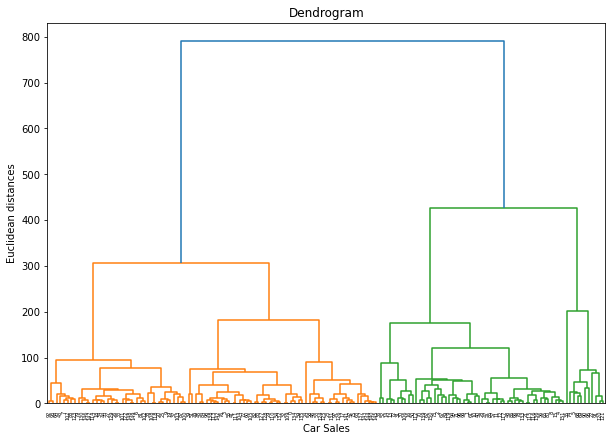

In [77]:
#Create and display a dendrogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title('Dendrogram')
plt.xlabel('Car Sales')
plt.ylabel('Euclidean distances')
#plt.axhline(y=300, color='r', linestyle='--')
#plt.axhline(y=400, color='r', linestyle='--')
dend = shc.dendrogram(shc.linkage(z, method='ward'))

In [78]:
#Implement model
agglo = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  


In [80]:
y_agglo = agglo.fit_predict(x)